In [1]:
import pandas as pd

In [2]:
# onbaord the chicago dataset file
chicago = pd.read_csv("C:/Users/CUB\Documents/CIRCLE PROJECT/chicago-crime-eda/chicago_crime_dataset.csv")

In [3]:
chicago.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
# Checking for null values
chicago.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [5]:
#Dropping redundant columns
column_list = ['Case Number', 'Unnamed: 0', 'Location', 'X Coordinate', 'Y Coordinate', 'FBI Code', 'IUCR']
chicago.drop(columns=column_list, inplace=True)

In [6]:
chicago.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude
0,6407111,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120
1,11398199,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747
2,5488785,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959
3,11389116,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590
4,12420431,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082


In [7]:
chicago.isna().sum()

ID                           0
Date                         0
Block                        0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
dtype: int64

In [8]:
# drop all null longitude and latitude
chicago.dropna(subset=['Longitude'], inplace=True) 
chicago.dropna(subset=['Latitude'], inplace=True)  

In [9]:
chicago.isna().sum()

ID                           0
Date                         0
Block                        0
Primary Type                 0
Description                  0
Location Description      1869
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    181939
Community Area          181546
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
dtype: int64

In [10]:
# Using forward fill to replace the null values
chicago['Location Description'] = chicago['Location Description'].ffill()
chicago['District'] = chicago['District'].ffill()
chicago['Ward'] = chicago['Ward'].ffill()
chicago['Community Area'] = chicago['Community Area'].ffill()

In [11]:
chicago.isna().sum()

ID                      0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Year                    0
Updated On              0
Latitude                0
Longitude               0
dtype: int64

In [12]:
# Creating a dictionary for community area for mapping
community = {1.0 : 'Rogers Park',
                2.0 : 'West Ridge',
                3.0 : 'Uptown',
               4.0 : 'Lincoln Square',
                6.0 : 'Lake View',
                7.0 : 'Lincoln Park',
                8.0 : 'Near North Side',
                9.0 : 'Edison Park',
                10.0 : 'Norwood Park',
                11.0 : 'Jefferson Park',
                12.0 : 'Forest Glen',
                13.0 : 'North Park',
                14.0 : 'Albany Park',
                15.0 : 'Portage Park',
                16.0 : 'Irving Park',
                17.0 : 'Dunning',
                18.0 : 'Montclare',
                19.0 : 'Belmont Cragin',
                20.0 : 'Hermosa',
                21.0 : 'Avondale',
                22.0 : 'Logan Square',
                23.0 : 'Humboldt Park',
                24.0 : 'West Town',
                25.0 : 'Austin',
                26.0 : 'West Garfield Park',
                27.0 : 'East Garfield Park',
                28.0 : 'Near West Side',
                29.0 : 'North Lawndale',
                30.0 : 'South Lawndale',
                31.0 : 'Lower West Side',
                32.0 : '(The) Loop',
               33.0 : 'Near South Side',
                34.0 : 'Armour Square',
                35.0 : 'Douglas',
                36.0 : 'Oakland',
                37.0 : 'Fuller Park',
                38.0: 'Grand Boulevard',
                39.0 : 'Kenwood',
                40.0 : 'Washington Park',
                41.0 : 'Hyde Park',
                42.0 : 'Woodlawn',
                43.0 : 'South Shore',
                44.0 : 'Chatham',
                45.0 : 'Avalon Park',
                46.0 : 'South Chicago',
                47.0 : 'Burnside',
                48.0 : 'Calumet Heights',
                49.0 : 'Roseland',
                50.0 : 'Pullman',
                51.0: 'South Deering',
                52.0 : 'East Side',
                53.0 : 'West Pullman',
                54.0 : 'Riverdale',
                55.0 : 'Hegewisch',
                56.0 : 'Garfield Ridge',
                57.0 : 'Archer Heights',
                58.0 : 'Brighton Park',
                59.0 : 'McKinley Park',
                60.0 : 'Bridgeport',
                61.0 : 'New City',
                62.0 : 'West Elsdon',
                63.0 : 'Gage Park',
                64.0 : 'Clearing',
                65.0 : 'West Lawn',
                66.0 : 'Chicago Lawn',
                67.0 : 'West Englewood',
                68.0 : 'Englewood',
                69.0 : 'Greater Grand Crossing',
                70.0 : 'Ashburn',
                71.0 : 'Auburn Gresham',
                72.0 : 'Beverly',
                73.0 : 'Washington Heights',
                74.0 : 'Mount Greenwood',
                75.0: 'Morgan Park',
                76.0 : 'OHare',
                77.0 : 'Edgewater',
                }

In [13]:
# Creating a Column with Community Name
chicago['Community Name'] = chicago['Community Area'].map(community)

In [14]:
chicago.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Community Name
0,6407111,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,South Chicago
1,11398199,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,Burnside
2,5488785,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,Forest Glen
3,11389116,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,West Garfield Park
4,12420431,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,Near West Side


In [15]:
chicago.isna().sum()

ID                          0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
Year                        0
Updated On                  0
Latitude                    0
Longitude                   0
Community Name          13370
dtype: int64

In [16]:
# Dropping null values in Community Name
chicago.dropna(subset=['Community Name'], inplace=True) 

In [17]:
chicago.isna().sum()

ID                      0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Community Name          0
dtype: int64

In [18]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2241371 entries, 0 to 2278725
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Block                 object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   Beat                  int64  
 9   District              float64
 10  Ward                  float64
 11  Community Area        float64
 12  Year                  int64  
 13  Updated On            object 
 14  Latitude              float64
 15  Longitude             float64
 16  Community Name        object 
dtypes: bool(2), float64(5), int64(3), object(7)
memory usage: 277.9+ MB


In [19]:
# convert datetime to date
chicago['Date'] = pd.to_datetime(chicago['Date'])
chicago['Updated On'] = pd.to_datetime(chicago['Updated On'])

C:\Users\CUB\AppData\Local\Temp\ipykernel_23592\3236970243.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicago['Date'] = pd.to_datetime(chicago['Date'])
C:\Users\CUB\AppData\Local\Temp\ipykernel_23592\3236970243.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicago['Updated On'] = pd.to_datetime(chicago['Updated On'])


In [20]:
chicago.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Community Name
0,6407111,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,2008,2018-02-28 15:56:25,41.739980,-87.555120,South Chicago
1,11398199,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,2018,2018-08-07 16:02:59,41.726922,-87.599747,Burnside
2,5488785,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,2007,2018-02-28 15:56:25,41.994138,-87.734959,Forest Glen
3,11389116,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,2018,2018-07-30 15:52:24,41.881217,-87.730590,West Garfield Park
4,12420431,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,2021,2021-07-18 16:56:02,41.874174,-87.668082,Near West Side


In [21]:
chicago['Date of Incident'] = chicago['Date'].dt.date

In [22]:
#converting date to day name
chicago['Day of Incident'] = chicago['Date'].dt.day_name()

In [23]:
#converting date to month
chicago['Month of Incident'] = chicago['Date'].dt.strftime('%B')

In [24]:
chicago.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Community Name,Date of Incident,Day of Incident,Month of Incident
0,6407111,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,2008,2018-02-28 15:56:25,41.739980,-87.555120,South Chicago,2008-07-26,Saturday,July
1,11398199,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,2018,2018-08-07 16:02:59,41.726922,-87.599747,Burnside,2018-07-31,Tuesday,July
2,5488785,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,2007,2018-02-28 15:56:25,41.994138,-87.734959,Forest Glen,2007-04-27,Friday,April
3,11389116,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,2018,2018-07-30 15:52:24,41.881217,-87.730590,West Garfield Park,2018-07-23,Monday,July
4,12420431,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,2021,2021-07-18 16:56:02,41.874174,-87.668082,Near West Side,2021-07-11,Sunday,July


In [25]:
# Creating a dictionary for seasons
season = {
    'January': 'Winter',
    'February':	'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May':'Spring',
    'June':	'Summer',
    'July':	'Summer',
    'August': 'Summer',
    'September': 'Autumn',
    'October' :'Autumn',
    'November':	'Autumn',
    'December': 'Winter'
}

In [26]:
chicago['Season'] = chicago['Month of Incident'].map(season)

In [27]:
chicago.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Community Area,Year,Updated On,Latitude,Longitude,Community Name,Date of Incident,Day of Incident,Month of Incident,Season
0,6407111,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,46.0,2008,2018-02-28 15:56:25,41.739980,-87.555120,South Chicago,2008-07-26,Saturday,July,Summer
1,11398199,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,...,47.0,2018,2018-08-07 16:02:59,41.726922,-87.599747,Burnside,2018-07-31,Tuesday,July,Summer
2,5488785,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,12.0,2007,2018-02-28 15:56:25,41.994138,-87.734959,Forest Glen,2007-04-27,Friday,April,Spring
3,11389116,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,...,26.0,2018,2018-07-30 15:52:24,41.881217,-87.730590,West Garfield Park,2018-07-23,Monday,July,Summer
4,12420431,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,...,28.0,2021,2021-07-18 16:56:02,41.874174,-87.668082,Near West Side,2021-07-11,Sunday,July,Summer


## Heat map of top crime loations in chicago

In [28]:
location_df = chicago.groupby(['Longitude', 'Latitude']).size().reset_index(name='Frequency')


In [29]:
location_df

,Longitude,Latitude,Frequency
0,-91.686566,36.619446,28
1,-87.939733,41.996235,1
2,-87.934567,41.995759,1
3,-87.934324,41.996958,1
4,-87.934273,42.008162,2
...,...,...,...
540549,-87.524532,41.701771,3
540550,-87.524530,41.701864,1
540551,-87.524530,41.701902,1
540552,-87.524529,41.701938,2


In [30]:
location_top = location_df.sort_values(by='Frequency', ascending=False).head(20)
location_top

,Longitude,Latitude,Frequency
121,-87.905227,41.976290,4227
84454,-87.741529,41.754593,3045
431940,-87.627877,41.883500,2415
443168,-87.624097,41.897895,1453
83189,-87.742729,41.909664,1049
430879,-87.628203,41.896889,1018
84503,-87.741480,41.788987,901
168776,-87.709271,41.868181,873
115656,-87.726422,41.885488,854
432031,-87.627842,41.882334,790


In [31]:
import folium
from folium.plugins import HeatMap

In [32]:
# Create a base map centered at an approximate location
map = folium.Map(location=[location_top['Latitude'].mean(), location_top['Longitude'].mean()], zoom_start=10)

# Create a HeatMap layer
heat_data = [[row['Latitude'], row['Longitude'], row['Frequency']] for index, row in location_top.iterrows()]
HeatMap(heat_data).add_to(map)

# Display map
map


## Top 10 crimes committed in chicago

In [33]:
import matplotlib.pyplot as plt

In [34]:
top_crimes = chicago['Primary Type'].value_counts().nlargest(10).reset_index(name='Count')
top_crimes

,Primary Type,Count
0,THEFT,469350
1,BATTERY,415455
2,CRIMINAL DAMAGE,256948
3,NARCOTICS,218885
4,ASSAULT,146478
5,OTHER OFFENSE,139656
6,BURGLARY,123426
7,MOTOR VEHICLE THEFT,104329
8,DECEPTIVE PRACTICE,93578
9,ROBBERY,84954


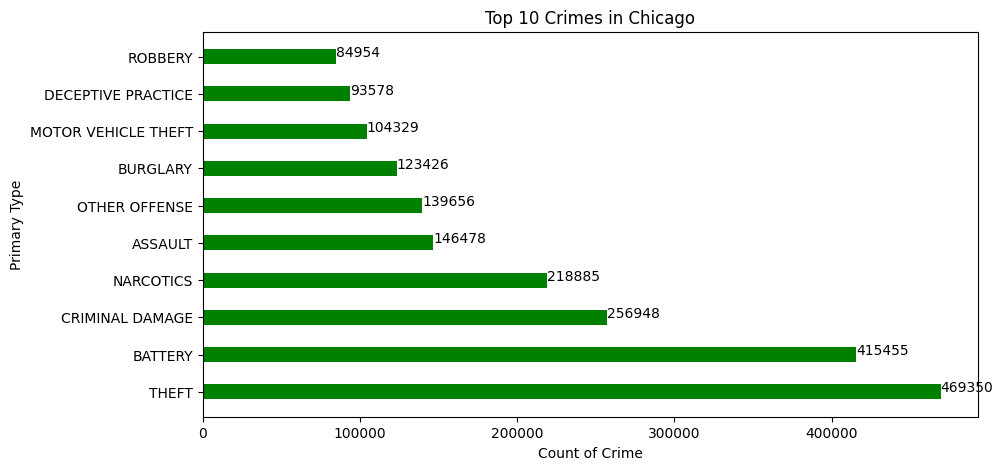

In [35]:
#Plotting a horizontal bar chart

plt.figure(figsize=(10,5))
plt.barh(top_crimes['Primary Type'], top_crimes['Count'], height=0.4, color='green')

for index, value in enumerate(top_crimes['Count']):
    plt.text(value, index, str(value))  # Add frequency as label
plt.xlabel('Count of Crime')
plt.ylabel('Primary Type')
plt.title('Top 10 Crimes in Chicago')
plt.show()


## Crime committed by Community Name

In [36]:
crime_by_community = chicago.groupby('Community Name')['Primary Type'].value_counts().sort_values(ascending=False)
crime_by_community

Community Name   Primary Type     
Near North Side  THEFT                31299
Austin           BATTERY              29053
                 NARCOTICS            28829
(The) Loop       THEFT                26451
Near West Side   THEFT                21358
                                      ...  
Albany Park      OBSCENITY                1
Hyde Park        PUBLIC INDECENCY         1
Humboldt Park    PUBLIC INDECENCY         1
Washington Park  PUBLIC INDECENCY         1
Woodlawn         HUMAN TRAFFICKING        1
Name: count, Length: 2213, dtype: int64

## Total crime by Year

In [37]:
year_subset = chicago.groupby(chicago['Year'])
crime_by_year = year_subset.size().sort_index(ascending=False)
crime_by_year

Year
2022     36563
2021     60754
2020     62270
2019     77158
2018     79056
2017     79144
2016     80075
2015     76867
2014     81663
2013     91016
2012    100077
2011    104976
2010    110344
2009    115627
2008    125044
2007    129558
2006    133127
2005    133715
2004    139270
2003    140502
2002    140014
2001    144551
dtype: int64

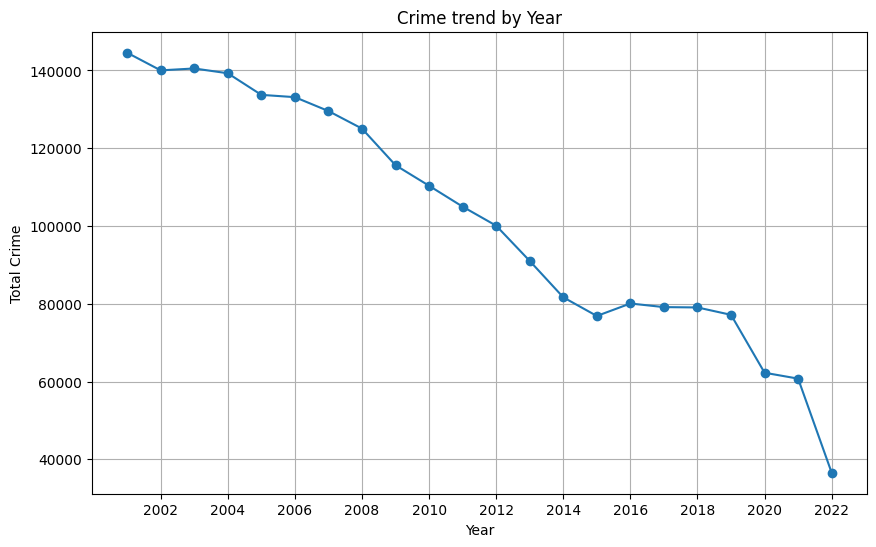

In [38]:
crime_by_year.plot(kind='line', marker='o', figsize=(10,6))

plt.title('Crime trend by Year')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.grid(True)
plt.xticks(crime_by_year.index[::2])

plt.show()

## Arrests in Chicago

In [39]:
arrest_in_chicago = chicago['Arrest'].value_counts()
arrest_in_chicago

Arrest
False    1646061
True      595310
Name: count, dtype: int64

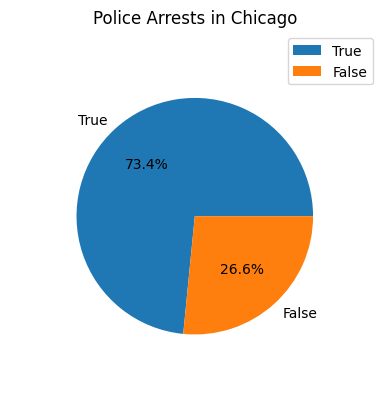

In [40]:
arrest_status = ['True','False']
plt.pie(arrest_in_chicago,autopct='%1.1f%%', labels = arrest_status, radius=0.8)
plt.title('Police Arrests in Chicago')
plt.legend()
plt.show()

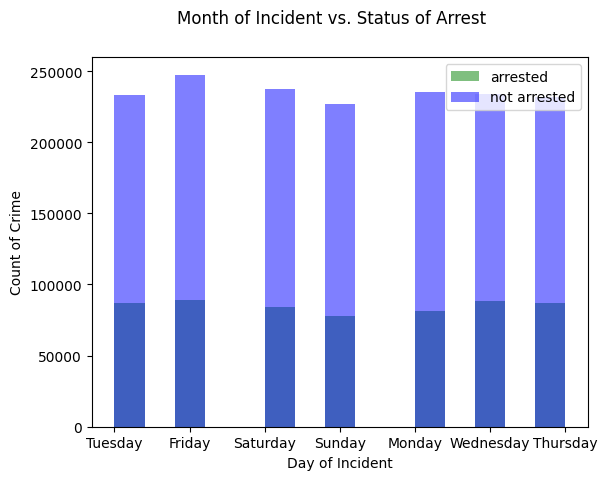

In [51]:
fig, ax = plt.subplots()

ax.hist(chicago[chicago["Arrest"]==True]["Day of Incident"],bins=15, alpha=0.5, color='green', label="arrested")
ax.hist(chicago[chicago["Arrest"]==False]["Day of Incident"], bins=15, alpha=0.5, color='blue', label="not arrested")

ax.set_xlabel("Day of Incident")
ax.set_ylabel("Count of Crime")

fig.suptitle("Month of Incident vs. Status of Arrest")

ax.legend()

### Distribution of Arrests over the Years

C:\Users\CUB\AppData\Local\Temp\ipykernel_23592\3098575463.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(chicago[chicago["Arrest"]==True]["Year"], shade=True, color="blue", label="arrested", ax=ax)
C:\Users\CUB\AppData\Local\Temp\ipykernel_23592\3098575463.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(chicago[chicago["Arrest"]==False]["Year"], shade=True, color="green", label="not arrested", ax=ax)


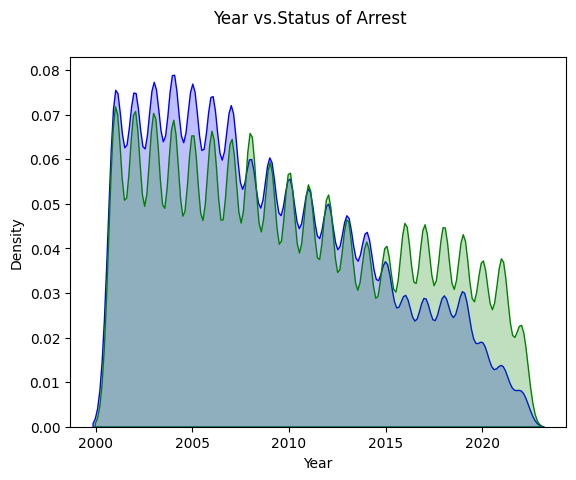

In [53]:
import seaborn as sns
fig, ax = plt.subplots()

sns.kdeplot(chicago[chicago["Arrest"]==True]["Year"], shade=True, color="blue", label="arrested", ax=ax)
sns.kdeplot(chicago[chicago["Arrest"]==False]["Year"], shade=True, color="green", label="not arrested", ax=ax)

ax.set_xlabel("Year")
ax.set_ylabel("Density")

fig.suptitle("Year vs.Status of Arrest");

## Crimes by Season in Chicago

In [54]:
crime_by_season = chicago['Season'].value_counts().reset_index(name='Count of Crime')
crime_by_season

,Season,Count of Crime
0,Summer,615757
1,Spring,572478
2,Autumn,556263
3,Winter,496873


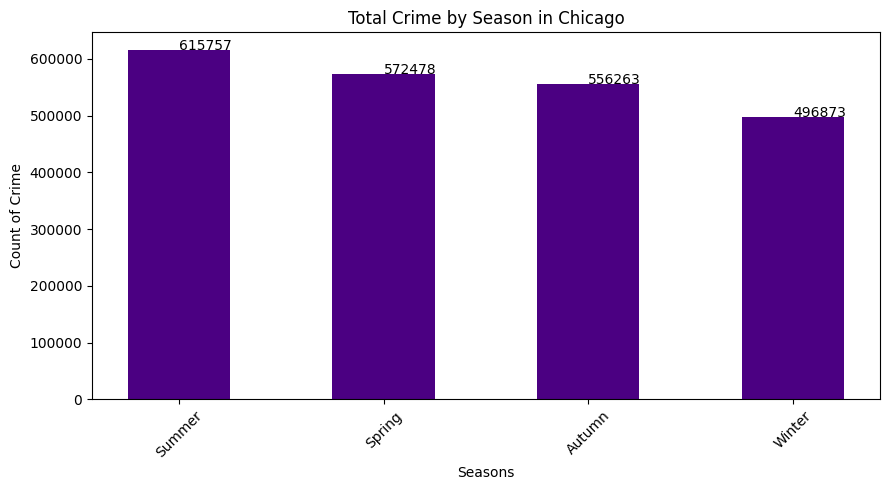

In [55]:

plt.figure(figsize=(9,5))
plt.bar(crime_by_season['Season'], crime_by_season['Count of Crime'],width=0.5, color = 'indigo') 
for index, value in enumerate(crime_by_season['Count of Crime']):
    plt.text(index,value, str(value))  # Add frequency as label
plt.xlabel('Seasons')
plt.ylabel('Count of Crime')
plt.title('Total Crime by Season in Chicago')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Locations by Crime

In [56]:
crime_by_location = chicago['Location Description'].value_counts().nlargest(10).reset_index(name='Count of Crime').sort_values(ascending=True, by='Count of Crime')
crime_by_location

,Location Description,Count of Crime
9,RESIDENCE-GARAGE,39648
8,SMALL RETAIL STORE,42260
7,"SCHOOL, PUBLIC, BUILDING",43216
6,ALLEY,50188
5,PARKING LOT/GARAGE(NON.RESID.),60248
4,OTHER,79333
3,SIDEWALK,214527
2,APARTMENT,249581
1,RESIDENCE,376440
0,STREET,583480


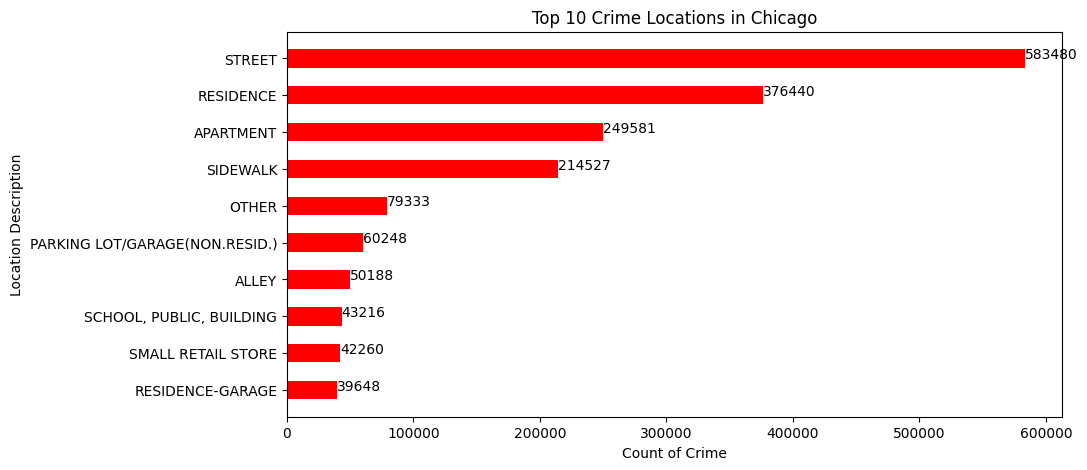

In [57]:
plt.figure(figsize=(10,5))
plt.barh(crime_by_location['Location Description'], crime_by_location['Count of Crime'], height=0.5, color='red')

for index, value in enumerate(crime_by_location['Count of Crime']):
    plt.text(value, index, str(value))  # Add frequency as label
plt.xlabel('Count of Crime')
plt.ylabel('Location Description')
plt.title('Top 10 Crime Locations in Chicago')
plt.show()

## Top 10 communities with the most crime incidents

In [58]:
crime_by_community = chicago['Community Name'].value_counts().nlargest(10)
crime_by_community

Community Name
Austin             141925
Near North Side     78979
South Shore         74855
Humboldt Park       71005
Near West Side      67444
West Town           66107
North Lawndale      65603
West Englewood      65146
Auburn Gresham      64139
Roseland            60018
Name: count, dtype: int64

## Communities with the least crime incidents

In [59]:
least_crime = chicago['Community Name'].value_counts().nsmallest(5)
least_crime

Community Name
Edison Park        2258
Burnside           3468
Forest Glen        4154
Hegewisch          4979
Mount Greenwood    5065
Name: count, dtype: int64

## Crime Incident by Days

In [60]:
crime_by_days = chicago["Day of Incident"].value_counts().reset_index(name='Count of Crime')

In [61]:
crime_by_days

,Day of Incident,Count of Crime
0,Friday,336882
1,Wednesday,322431
2,Saturday,321444
3,Tuesday,320393
4,Thursday,318817
5,Monday,316414
6,Sunday,304990


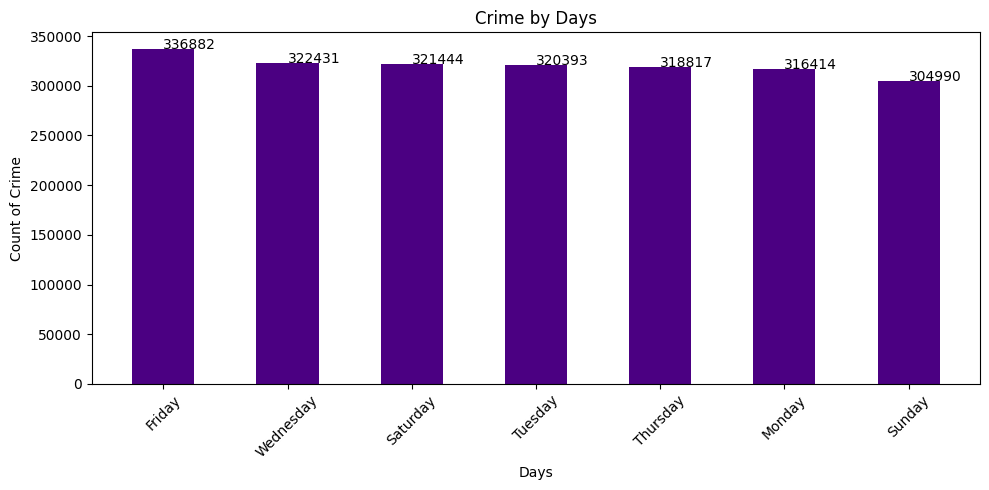

In [62]:
plt.figure(figsize=(10,5))
plt.bar(crime_by_days['Day of Incident'],crime_by_days['Count of Crime'], width=0.5, color='indigo')
for index, value in enumerate(crime_by_days['Count of Crime']):
    plt.text(index,value, str(value))  # Add frequency as label
plt.xlabel('Days')
plt.ylabel('Count of Crime')
plt.title('Crime by Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Crime in the year 2022

In [63]:
crime_in_2022 = chicago[chicago['Year'] == 2022]

In [64]:
crime_by_primarytype = crime_in_2022.groupby(crime_in_2022['Primary Type']).size().sort_values(ascending=False)

In [65]:
crime_by_primarytype

Primary Type
THEFT                                8236
BATTERY                              6810
CRIMINAL DAMAGE                      4176
ASSAULT                              3438
OTHER OFFENSE                        2516
MOTOR VEHICLE THEFT                  2291
DECEPTIVE PRACTICE                   2193
WEAPONS VIOLATION                    1565
ROBBERY                              1398
BURGLARY                             1184
CRIMINAL TRESPASS                     721
NARCOTICS                             703
OFFENSE INVOLVING CHILDREN            316
CRIMINAL SEXUAL ASSAULT               247
SEX OFFENSE                           200
HOMICIDE                              105
PUBLIC PEACE VIOLATION                103
INTERFERENCE WITH PUBLIC OFFICER       67
ARSON                                  66
STALKING                               55
PROSTITUTION                           46
CONCEALED CARRY LICENSE VIOLATION      38
LIQUOR LAW VIOLATION                   38
INTIMIDATION         